## Classification using SVMs


In this notebook we'll play around with how Machine learning models can perform classification tasks. In particular we'll explore SVM's and in particular how biased datasets can lead to different modelling situations. As with the regression module we'll employ K-Fold cross-validation to ensure that our results generalize well. We'll also look into evaluation methods for classification models such as sensitivity, specificity and receiver operating characteristic curves (and area under the curve). 

In [31]:
from sklearn.datasets import make_classification

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
plt.style.use('seaborn')

## Creating your dataset

Bivariate SVM

In [54]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                         n_classes=2, n_clusters_per_class=1, random_state=20)

In [55]:
df = pd.DataFrame(np.c_[X,y])
colnames = ['x1','x2','y']
df.columns = colnames
df['y'] = df['y'].astype(np.int)
df.head()

,x1,x2,y
0,-1.257058,0.685894,1
1,-0.590457,-0.498016,0
2,-1.363312,-0.903410,0
3,0.952940,2.542868,1
4,-0.322592,2.122788,1


First step as usual when working with new datasets is to perform some visualization. While we won't have the luxury to do this with high dimensional data which is probably most contexts in which classification is performed, playing with a low-dimensional case is good for building intuition:

Text(0.5, 1.0, 'Raw data plot')

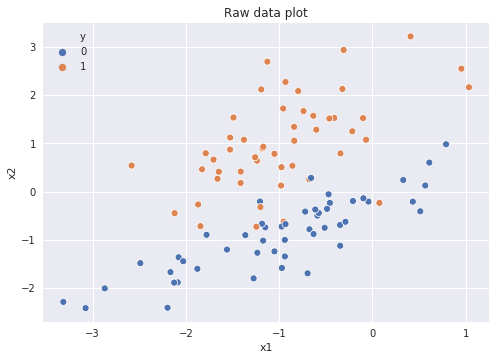

In [56]:
ax = sns.scatterplot(x='x1',y='x2',data=df,hue='y',palette='deep')
ax.set_title('Raw data plot')

As you can see from the data there's some separation between both classes of the data. Our goal is to train a Support Vector Machine classifier to model the separation between the classes. As with most machine learning tools, <code>sklearn</code> also has a support vector machine classifier:

In [57]:
from sklearn.svm import SVC

In [58]:
svm = SVC(kernel='linear')

First let's fit the model on the entire dataset just to get a quick hands-on peek on what you can do after fitting an SVM model:

In [59]:
svm.fit(df[['x1','x2']],df['y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now we can inspect from properties of this model to get a better idea about how it performed on our full dataset. First we'll visualize the dividing line generated by this model:

First, note that since this particular SVM is a linear model, fitting the model results in a linear model much like linear regression. The only difference being is that this line is designed to cut across two classes rather than to  minimize the mean squared error as we did with linear regression:

In [60]:
print(svm.intercept_)
print(svm.coef_)

[-1.17801075]
[[-1.39362988  1.9420917 ]]


Evaluation of the model requires us to write out the equation of the plane decided by the svm model and re-arrange the equation to solve for $x_1$ or $x_2$ (both are equivalent):

$$ax_1 + bx_2 + c = 0$$
$$x_2 = \frac{-ax_1 - c}{b}$$

In [61]:
evalX = np.linspace(-3,3)
evaly = (-svm.coef_[0][0] * evalX - svm.intercept_)/svm.coef_[0][1]

Now that we've compute our linear boundary let's visualize what it looks like!

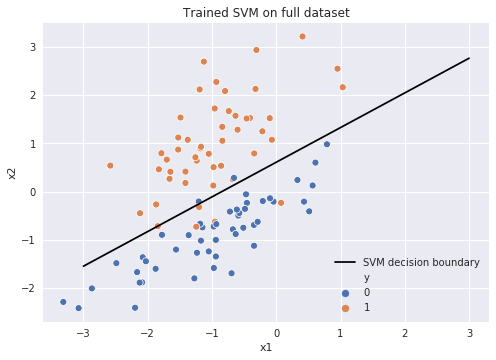

In [62]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='x1',y='x2',data=df,hue='y',palette='deep')
ax.plot(evalX,evaly,'k',label='SVM decision boundary')
ax.set_title('Trained SVM on full dataset')
ax.legend()
plt.show()

Furthermore, we can visualize which vectors were used as support vectors as well!

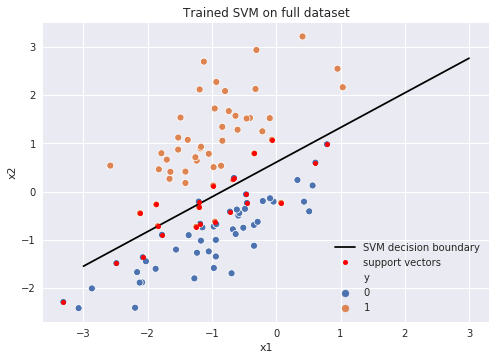

In [63]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='x1',y='x2',data=df,hue='y',palette='deep')
ax.plot(evalX,evaly,'k',label='SVM decision boundary')
ax.plot(svm.support_vectors_[:,0],svm.support_vectors_[:,1],'r.',markersize=10,label='support vectors')
ax.set_title('Trained SVM on full dataset')
ax.legend()
plt.show()

We can also plot the margins used in the SVM model as well. The margins of the SVM are described by the following equation:

For the top margin:
$$ ax_1 + bx_2 + c = 1 $$

For the bottom margin:
$$ ax_1 + bx_2 + c = -1 $$

Re-arranging the equations to solve for $x_2$ as usual (for the top margin):

$$x_2 = \frac{1- ax_1 - c}{b}$$

In [73]:
top_margin = (1 - svm.coef_[0][0] * evalX - svm.intercept_)/svm.coef_[0][1]
bottom_margin = (-1 - svm.coef_[0][0] * evalX -svm.intercept_)/svm.coef_[0][1]

Now we can visualize the full SVM result!

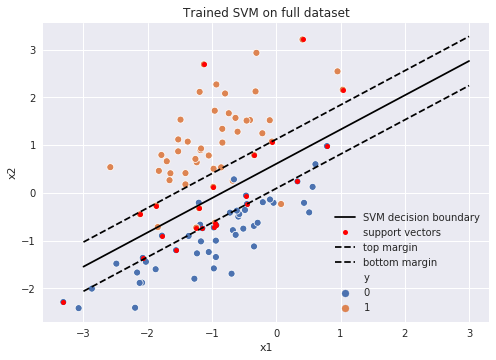

In [114]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='x1',y='x2',data=df,hue='y',palette='deep')
ax.plot(evalX,evaly,'k',label='SVM decision boundary')
ax.plot(svm.support_vectors_[:,0],svm.support_vectors_[:,1],'r.',markersize=10,label='support vectors')
ax.plot(evalX,top_margin,'k--',label='top margin')
ax.plot(evalX,bottom_margin,'k--',label='bottom margin')
ax.set_title('Trained SVM on full dataset')
ax.legend()
plt.show()

This visualization will becoming increasingly useful as we start thinking about regularization!

Finally, recall that SVM's judge a data-point's class by calculating a score that is dependent on the distance of the point from the hyperplane. If we feed in a new point to the model we can evaluate the "decision function" which is the score given to data point. The SVM model then applies a threshold (which we can modify to tradeoff sensitivity vs specificity) to assign a class. Let's feed the model a point and see what score it gives it!

In [97]:
new_c1data = np.array([-3,3])
new_c1data = new_c1data[np.newaxis,:]
new_c2data = np.array([3,-3])
new_c2data = new_c2data[np.newaxis,:]

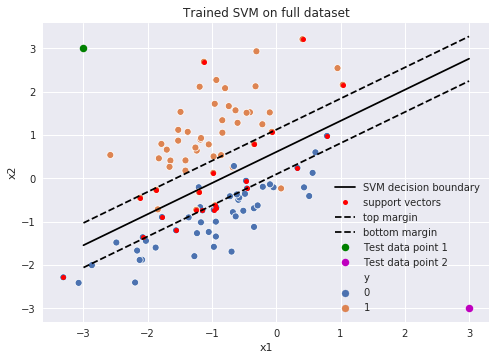

In [113]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x='x1',y='x2',data=df,hue='y',palette='deep')
ax.plot(evalX,evaly,'k',label='SVM decision boundary')
ax.plot(svm.support_vectors_[:,0],svm.support_vectors_[:,1],'r.',markersize=10,label='support vectors')
ax.plot(evalX,top_margin,'k--',label='top margin')
ax.plot(evalX,bottom_margin,'k--',label='bottom margin')
ax.plot(new_c1data[0,0],new_c1data[0,1],'g.', markersize=15,label='Test data point 1')
ax.plot(new_c2data[0,0],new_c2data[0,1],'m.', markersize=15,label='Test data point 2')
ax.set_title('Trained SVM on full dataset')
ax.legend()
plt.show()

In [100]:
print(svm.decision_function(new_c1data))
print(svm.decision_function(new_c2data))

[8.82915399]
[-11.1851755]


We can see that the SVM model assigns positive values to class 1 and negative values to class 0

Now let's do some things more properly and use holdout cross validation to evaluate our model then compute some important metrics such as **accuracy**, **sensitivity**, **specificity**, **Reciever Operating Characteristics**, and **Area under the curve**

***

## Computing Classification Metrics

First let's do some (more) responsible model training. First let's split our dataset into train and test, train our model on the training set then start evaluating some metrics to get an idea of how well our model handles cases. Let's move onto a higher dimensional space that is slightly harder to deal with:

In [102]:
from sklearn.model_selection import train_test_split

In [217]:
X,y = make_classification(n_samples=600,n_features=200,n_informative=2,n_redundant=30,n_repeated=0,
                         n_classes=2, n_clusters_per_class=1,class_sep=0.5,random_state=312)

df = pd.DataFrame(np.c_[X,y])
colnames = ['x{}'.format(i) for i in np.arange(X.shape[1])]
colnames.append('y')
df.columns = colnames
feature_columns = [x for x in colnames if 'x' in x]

In [218]:
#Split into holdout dataset
trainX, testX, trainy, testy = train_test_split(df[feature_columns],df['y'], test_size=0.4, random_state=210)


In [219]:
#Train model
svm = SVC()
svm.fit(trainX,trainy)

/home/jerry/.pyenv/versions/3.7.0/envs/scwg_ml/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now that we've fit our model, we can start to calculate classification metrics on the test dataset. *Only metrics calculated on the test dataset are useful towards evaluating the expected performance of your model on unseen data!*. 

An easy way to generate these probabilities is to predict the classes in the test case, then use <code>sklearn.metrics.confusion_matrix</code> to generate our 2x2 table

In [220]:
from sklearn.metrics import confusion_matrix

In [221]:
predy = svm.predict(testX)
c_matrix = confusion_matrix(testy,predy)

In [222]:
print(c_matrix)

[[ 96  25]
 [ 17 102]]


Recall that the confusion matrix assesses in a table:

<table>
    <tr>
        <td> True Negatives </td>
        <td> False Positives </td>
    </tr>
    <tr>
        <td> False Negative </td>
        <td> True Positives </td>
</table>



### Exercise:
Using the confusion matrix table calculate:

1. Accuracy on test set
2. Specificity on test set
3. Sensitivity on test set

### Solution:

The following equations are used:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


$$\text{Specificity} = \frac{TN}{TN + FP}$$


$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

In [223]:
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
TP = c_matrix[1][1]

In [224]:
accuracy = (TN + TP)/ (TN + TP + FN + FP)
specificity = (TN) / (TN + FP)
sensitivity = (TP) / (TP + FN)

In [225]:
print(accuracy, specificity, sensitivity)

0.825 0.7933884297520661 0.8571428571428571


Looks like our model did pretty well! The final step is to explore the sensitivity/specificity trade-off and to plot the ROC curve. In order to explore the ROC curve we must first generate scores for each data point in the test set. Changing the threshold at which we classify data as being at class 0 or class 1 will yield the ROC curve:

In [226]:
from sklearn.metrics import roc_curve, auc

In [227]:
test_decisions = svm.decision_function(testX)
roc = roc_curve(testy,test_decisions)

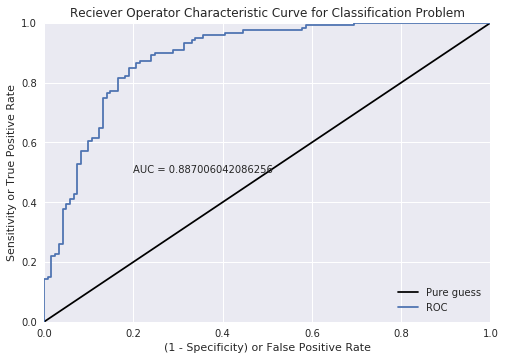

In [228]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k', label='Pure guess')
ax.plot(roc[0],roc[1],label='ROC')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_title('Reciever Operator Characteristic Curve for Classification Problem')
ax.text(0.2,0.5,'AUC = {}'.format(auc(roc[0],roc[1])), transform=ax.transAxes)
ax.set_ylabel('Sensitivity or True Positive Rate')
ax.set_xlabel('(1 - Specificity) or False Positive Rate')
ax.legend()
plt.show()

As you can see SVMs perform quite well in high dimensional space, there are some theoretical reasons why this is the case but that topic is too advanced for an intro course. We could do better by performing dimensionality reduction techniques or regularization (which is a feature that SVMs actually have built-in, see the $C$ parameter)... 

Finally, you might have noticed that our SVM is a linear function. However, we can extend the SVM to non-linear cases using something called the **Kernel Trick**. We won't get into it in this course but the **Kernel Trick** is an extraordinary property of the SVM that allows it to be widely applicable!